# This script convert graph dataset to adjacency matix and node vectors for machine learning
- most codes are the same as DEMO2
- in Config.py, "all genre" mode (genre=["all"] ) was set.
    - in this mode, all nodes in graphs will set as problems
        - in demo1, only conductivity nodes were set as problems
        - in demo2, only numeric nodes (of selected parametes) were set as problems.
        - in demo3, numeric nodes, word nodes, and compound nodes will be set as problems.
    - in demo 1,2, the prediction answers were scalars (1-dim), but now 60-dim, because words and compounds info are vectors.

In [1]:
import sys
sys.path.append("../MIGraph/GraphConv/")
sys.path.append("../MIGraph/Encoders/")
import numpy as np
import pandas as pd
from tqdm import tqdm
import joblib
import warnings
from Config import Config
import glob
from ConvGraphScript import drawGraph
from PrepDataset import PrepDataset

%load_ext autoreload
%autoreload 2
    
warnings.filterwarnings('ignore')
CF=Config()

print("mode: ",CF.genre)
print("targetParamMode: ",CF.targetParamMode)

/home/kh/anaconda3/envs/chem/lib/python3.6/site-packages/chainer/_environment_check.py:73: UserWarning: 
--------------------------------------------------------------------------------
CuPy (cupy) version 6.0.0 may not be compatible with this version of Chainer.
Please consider installing the supported version by running:
  $ pip install 'cupy>=7.2.0,<8.0.0'

See the following page for more details:
  https://docs-cupy.chainer.org/en/latest/install.html
--------------------------------------------------------------------------------

  requirement=requirement, help=help))


mode:  ['all']
targetParamMode:  True


In [2]:
#init compound encoder
PD=PrepDataset()
allCompundsPath="praparingGraphs/output/allcompounds.csv.gz"

PD.setCompoundEncoder(allCompundsPath)

 18%|█▊        | 443/2456 [00:00<00:00, 4421.11it/s]

number of smiles:  2456
calculate fingerprints
error  nan
error  [H]1[BH]2[H][BH]3[BH]24[BH]1[H][BH]4[H]3
error  [Cl-].[Cl-].[Zn2+]
error  [O-2]=[Ce+4]=[O-2]
error  [K+].o=c(-c(=o)o1)o[Fe-3]123(oc(-c(=o)o2)=o)oc(-c(=o)o3)=o.[K+].[K+]
error  [Cd+2].[Cd+2].[Cd+2].[AsH6-3].[AsH6-3]
error  FCl(F)(F)(F)F
error  [Cl-].[Cl-].[Cu2+]


 55%|█████▍    | 1349/2456 [00:00<00:00, 4466.63it/s]

error  O=[Cl]=O
error  O=Cl(=O)(=O)F
error  F[Ge-2](F)(F)(F)(F)F.[Na+].[Na+]
error  [Na+].[Na+].[Na+].[PH6-3]
error  FCl(=O)(=O)=O
error  [OH2][Re](=O)(=O)(=O)([OH2])O[Re](=O)(=O)=O
error  c1=cc=c[cH+]c=c1
error  [BH2-]1[H][BH2-][H]1
error  c1[nH]c2c(n1)c(=O)nc(n2)N
error  B1([H]3)(C2CCCC1CCC2)[H]B34C2CCCC4CCC2


100%|██████████| 2456/2456 [00:00<00:00, 4247.93it/s]


error  F[Si-2](F)(F)(F)(F)F.[Na+].[Na+]
error  F[Si-2](F)(F)(F)(F)F.[NH4+].[NH4+]
error  [H]1[BH]234[BH]156[BH]278[BH]39([H]4)[BH]712[BH]853[BH]645[BH]311[BH]922[BH]14([H]5)[H]2
error  [Na+].o=c(-c(=o)o1)o[Fe-3]123(oc(-c(=o)o2)=o)oc(-c(=o)o3)=o.[Na+].[Na+]
error  [Cl-].[Cl-].[Cl-].[In3+]
error  [Cl-].[Cl-].[Ni2+]
error  FBr(F)(F)(F)F
error  o=c([o-])C.[N+H4]
error  FCl(F)F
loading files
compressing and scaling


In [3]:
#load graph files
graphbinList=glob.glob("praparingGraphs/output/*.graphbin")
print(graphbinList)

for file in tqdm(graphbinList):
    print(file)
    gl=joblib.load(file)
    PD.graphList.extend(gl)

  0%|          | 0/2 [00:00<?, ?it/s]

['praparingGraphs/output/20190520wikipedia.graphbin', 'praparingGraphs/output/20200220PEDOTProcess.csv.graphbin']
praparingGraphs/output/20190520wikipedia.graphbin


 50%|█████     | 1/2 [00:00<00:00,  4.92it/s]

praparingGraphs/output/20200220PEDOTProcess.csv.graphbin


100%|██████████| 2/2 [00:00<00:00,  4.25it/s]


load BERT encoder
1581


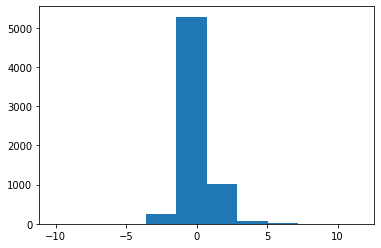

In [4]:
PD.setScaler()
print(len(PD.graphList))


In [5]:
#prepare dataset

#parallel mode off
PD.parallel=False
trainDataset=PD.convToDataset(CF.genre,graphList=PD.graphList)



  7%|▋         | 114/1581 [00:00<00:01, 1134.15it/s]

process  1581  graphs
converting graphs to vectors


100%|██████████| 1581/1581 [00:01<00:00, 831.25it/s] 
103it [00:00, 509.28it/s]

convert all nodes to problems


1581it [00:08, 184.28it/s]
100%|██████████| 25123/25123 [00:12<00:00, 1962.89it/s]
25123it [00:00, 1635574.14it/s]


In [6]:
joblib.dump(trainDataset,"bin/traindataset.bin",compress=9)
joblib.dump(PD,"bin/PD.bin", compress=9)        

['bin/PD.bin']

# following are codes to convert "inverse problem" graphs
- "Screen" mode used to prepare datasets.
    - in other modes, problems will be made by finding candidate nodes
    - here, we have already made "unknown" nodes. therefore, problem-making will not be done

In [7]:
#for inverse problem solving, special datasets will be also converted to matrixes
PD.initGraphList()
PD.parallel=False

#in "screen" mode, problems will not be mode
PD.mode="Screen"

graphbinList=glob.glob("praparingGraphs/screen_output/*.graphbin")
print(graphbinList)

['praparingGraphs/screen_output/sc1.graphbin']


In [8]:
for file in graphbinList:
    print(file)
    gl=joblib.load(file)
    PD.graphList.extend(gl)

screenDataset=PD.convToDataset(CF.genre)

print(len(screenDataset), "screen data")

joblib.dump(screenDataset,"bin/screendataset.bin")#, compress=1)        

100%|██████████| 4/4 [00:00<00:00, 1585.75it/s]
4it [00:00, 31956.60it/s]

praparingGraphs/screen_output/sc1.graphbin
process  4  graphs
converting graphs to vectors
4 screen data


['bin/screendataset.bin']

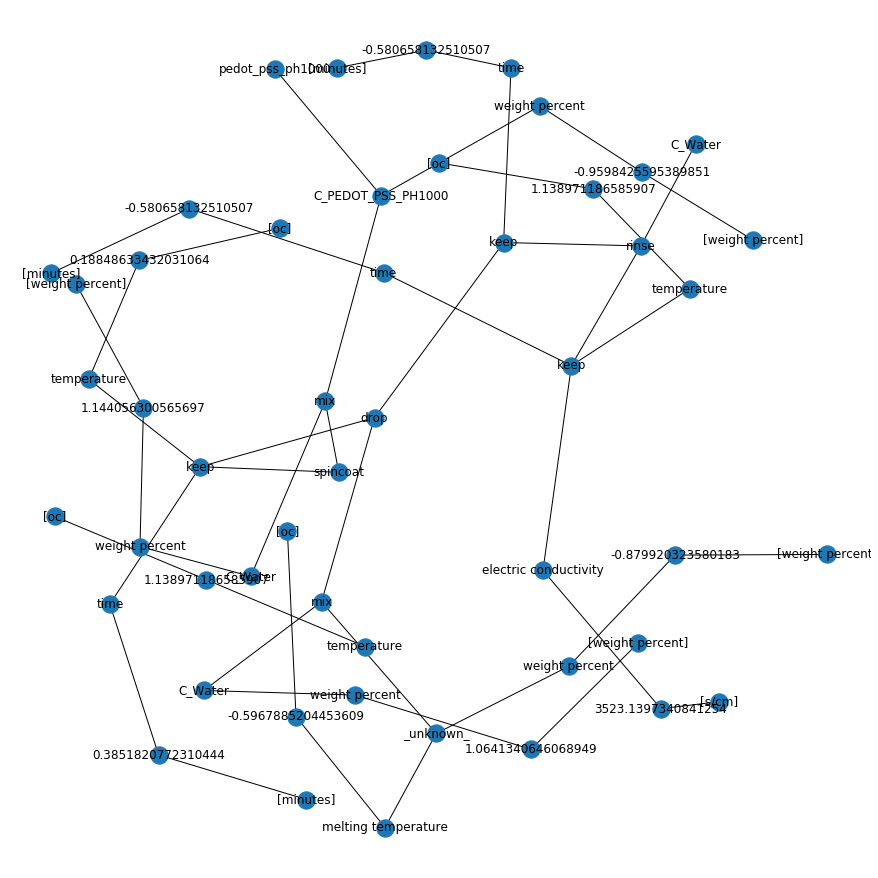

In [9]:
drawGraph(PD.graphList[-1])